In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [36]:
# We have extracted csv files of Train and Test set seperately to build Ensemble Classifiers.
X_train, X_test, y_train, y_test = pd.read_csv('X_train.csv'), pd.read_csv('X_test.csv'), pd.read_csv('y_train.csv'), pd.read_csv('y_test.csv')

In [37]:
classes = y_test['Diagnosis'].unique()
classes = sorted(classes)

---

## 1. Random Forest

In [38]:
model1 = RandomForestClassifier(max_depth=10, n_estimators=150, oob_score=True)
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, oob_score=True)

In [39]:
model1.score(X_test, y_test)

0.955

In [40]:
y_pred1 = pd.DataFrame(model1.predict(X_test), index=y_test.index, columns=['Diagnosis'])
y_pred1.head()

,Diagnosis
0,COPD
1,Healthy
2,COPD
3,Pneumonia
4,Healthy


In [41]:
print(classification_report(y_test, y_pred1))

                precision    recall  f1-score   support

Bronchiectasis       0.96      1.00      0.98        27
 Bronchiolitis       0.95      1.00      0.97        18
          COPD       1.00      0.91      0.95        79
       Healthy       0.90      0.97      0.93        29
     Pneumonia       0.91      0.97      0.94        31
          URTI       0.94      1.00      0.97        16

      accuracy                           0.95       200
     macro avg       0.94      0.97      0.96       200
  weighted avg       0.96      0.95      0.96       200



In [42]:
print('Precision =',precision_score(y_test, y_pred1, average='weighted'))
print('Recall =',recall_score(y_test, y_pred1, average='weighted'))
print('F1-Score =',f1_score(y_test, y_pred1, average='weighted'))

Precision = 0.9576126798149418
Recall = 0.955
F1-Score = 0.9550233547439675


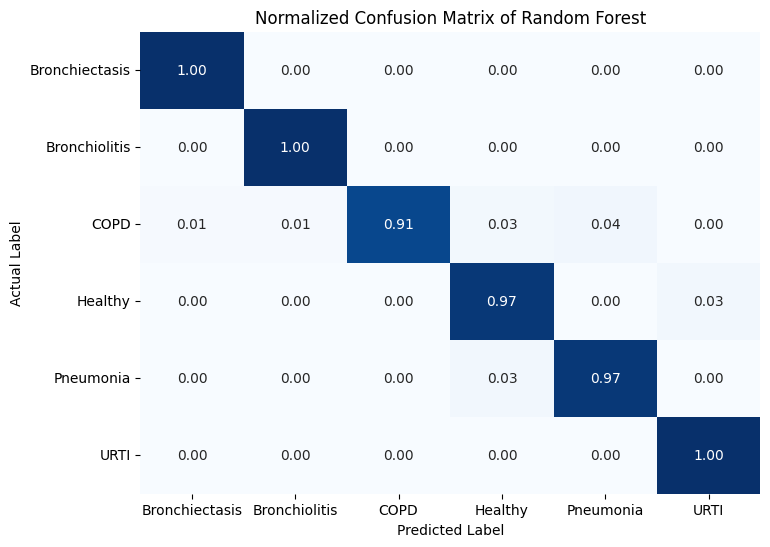

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred1)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Normalized Confusion Matrix of Random Forest')
plt.show()

In [44]:
model1 = RandomForestClassifier(max_depth=10, n_estimators=150, oob_score=True)
np.mean(cross_val_score(model1, pd.concat([X_train, X_test], axis=0), pd.concat([y_train, y_test], axis=0), cv=5, scoring='accuracy'))

0.9528592964824119

---

## 2. Gradient Boost

In [45]:
model2 = GradientBoostingClassifier(max_depth=8, max_features='sqrt', n_estimators=200)
model2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt', n_estimators=200)

In [46]:
model2.score(X_test, y_test)

0.975

In [47]:
y_pred2 = pd.DataFrame(model2.predict(X_test), index=y_test.index, columns=['Diagnosis'])
y_pred2.head()

,Diagnosis
0,COPD
1,Healthy
2,COPD
3,Pneumonia
4,Healthy


In [48]:
print(classification_report(y_test, y_pred2))

                precision    recall  f1-score   support

Bronchiectasis       1.00      1.00      1.00        27
 Bronchiolitis       1.00      1.00      1.00        18
          COPD       1.00      0.95      0.97        79
       Healthy       0.97      1.00      0.98        29
     Pneumonia       0.88      0.97      0.92        31
          URTI       1.00      1.00      1.00        16

      accuracy                           0.97       200
     macro avg       0.97      0.99      0.98       200
  weighted avg       0.98      0.97      0.98       200



In [49]:
print('Precision =',precision_score(y_test, y_pred2, average='weighted'))
print('Recall =',recall_score(y_test, y_pred2, average='weighted'))
print('F1-Score =',f1_score(y_test, y_pred2, average='weighted'))

Precision = 0.9769313725490195
Recall = 0.975
F1-Score = 0.9753595556985387


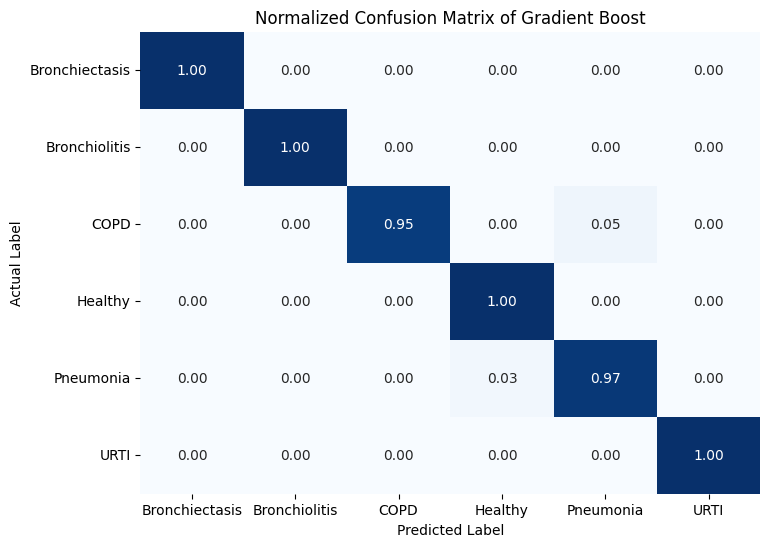

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred2)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Normalized Confusion Matrix of Gradient Boost')
plt.show()

In [51]:
model2 = GradientBoostingClassifier(max_depth=8, max_features='sqrt', n_estimators=200)
np.mean(cross_val_score(model2, pd.concat([X_train, X_test], axis=0), pd.concat([y_train, y_test], axis=0), cv=5, scoring='accuracy'))

0.9679095477386934

---

## 3. XG Boost

In [52]:
# Encoding the Labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [53]:
model3 = XGBClassifier(subsample=1, reg_alpha=0, n_estimators=300, max_depth=6, learning_rate=0.1, gamma=0, colsample_bytree=0.6)
model3.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
model3.score(X_test, y_test_encoded)

0.98

In [55]:
y_pred3 = pd.DataFrame(model3.predict(X_test), index=y_test.index, columns=['Diagnosis'])
y_pred3.head()

,Diagnosis
0,2
1,3
2,2
3,2
4,3


In [56]:
print(classification_report(y_test_encoded, y_pred3, target_names=le.classes_,))

                precision    recall  f1-score   support

Bronchiectasis       1.00      1.00      1.00        27
 Bronchiolitis       1.00      1.00      1.00        18
          COPD       1.00      0.95      0.97        79
       Healthy       1.00      1.00      1.00        29
     Pneumonia       0.91      1.00      0.95        31
          URTI       0.94      1.00      0.97        16

      accuracy                           0.98       200
     macro avg       0.98      0.99      0.98       200
  weighted avg       0.98      0.98      0.98       200



In [57]:
print('Precision =',precision_score(y_test_encoded, y_pred3, average='weighted'))
print('Recall =',recall_score(y_test_encoded, y_pred3, average='weighted'))
print('F1-Score =',f1_score(y_test_encoded, y_pred3, average='weighted'))

Precision = 0.9816176470588235
Recall = 0.98
F1-Score = 0.9801621711621712


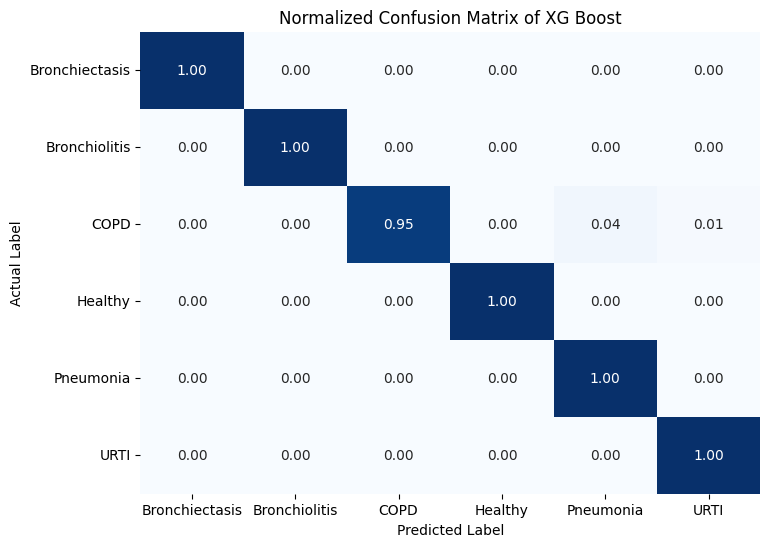

In [58]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred3)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Normalized Confusion Matrix of XG Boost')
plt.show()

In [59]:
model3 = XGBClassifier(subsample=1, reg_alpha=0, n_estimators=300, max_depth=6, learning_rate=0.1, gamma=0, colsample_bytree=0.6)
np.mean(cross_val_score(model3, pd.concat([X_train, X_test], axis=0), 
                        pd.concat([pd.DataFrame(y_train_encoded), pd.DataFrame(y_test_encoded)], axis=0), 
                        cv=5, scoring='accuracy'))

0.9668844221105527